In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [47]:
train_df= pd.read_csv('.../train_yhhx1Xs/train.csv')
test_df= pd.read_csv('.../test_QkPvNLx.csv')

In [48]:
train_df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [50]:
train_df.groupby(['Course_ID'])['Day_No'].count()

Course_ID
1      882
2      882
3      882
4      882
5      882
      ... 
596    882
597    882
598    882
599    882
600    882
Name: Day_No, Length: 600, dtype: int64

In [51]:
test_df.groupby(['Course_ID'])['Day_No'].count()

Course_ID
1      60
2      60
3      60
4      60
5      60
       ..
596    60
597    60
598    60
599    60
600    60
Name: Day_No, Length: 600, dtype: int64

In [39]:
train_df.describe()


,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [5]:
# Check Missing values
train_df.isna().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [6]:
test_df.isna().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

Univariate Analysis

Text(0.5, 1.0, 'Sales Distribution')

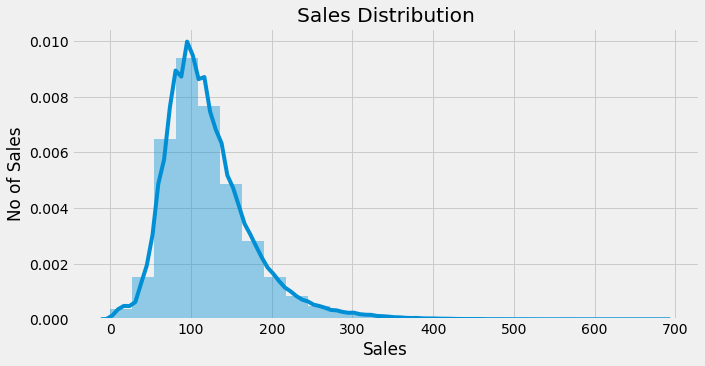

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (10,5))
sns.distplot(train_df.Sales, bins= 25)
plt.xlabel('Sales')
plt.ylabel('No of Sales')
plt.title('Sales Distribution')

In [8]:
numeric_features= train_df[['ID', 'Day_No', 'Course_ID', 'User_Traffic', 'Competition_Metric', 'Sales']]
numeric_features.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

In [9]:
corr= numeric_features.corr()
corr

,ID,Day_No,Course_ID,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001052,0.999996,0.033604,-0.007431,0.017037
Day_No,0.001052,1.000000,-0.000506,0.021511,0.003229,0.060012
Course_ID,0.999996,-0.000506,1.000000,0.033520,-0.007385,0.016894
User_Traffic,0.033604,0.021511,0.033520,1.000000,-0.148775,0.829741
Competition_Metric,-0.007431,0.003229,-0.007385,-0.148775,1.000000,-0.022085
Sales,0.017037,0.060012,0.016894,0.829741,-0.022085,1.000000


In [10]:
# Long_Promotion and Public_Holiday are least important factor, User_Traffic is highly correlated with Sales
print(corr['Sales'].sort_values(ascending= False))

Sales                 1.000000
User_Traffic          0.829741
Day_No                0.060012
ID                    0.017037
Course_ID             0.016894
Competition_Metric   -0.022085
Name: Sales, dtype: float64


In [11]:
# Distribution of Course_Type
train_df.Course_Type.value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

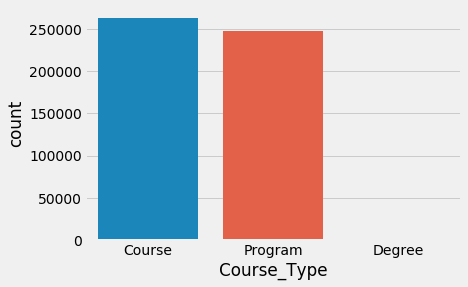

In [12]:
sns.countplot(train_df.Course_Type)

In [13]:
# Distribution of Course_Domain
train_df.Course_Domain.value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

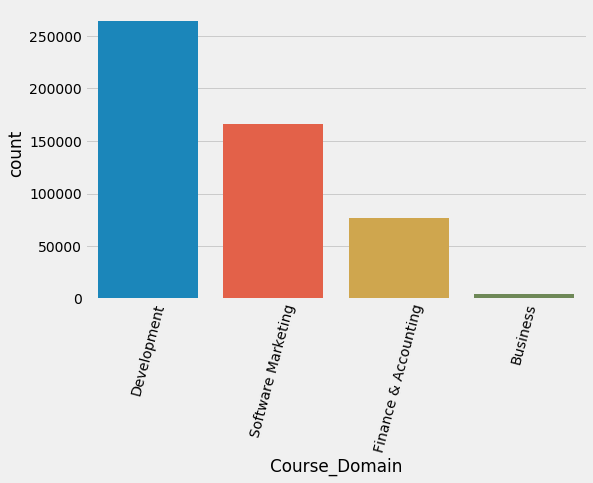

In [14]:
plt.figure(figsize= (8,5))
sns.countplot(train_df.Course_Domain)
plt.xticks(rotation= 75)

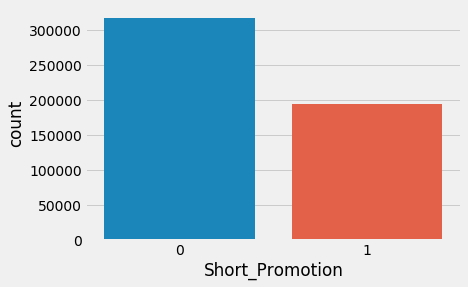

In [15]:
sns.countplot(train_df.Short_Promotion)

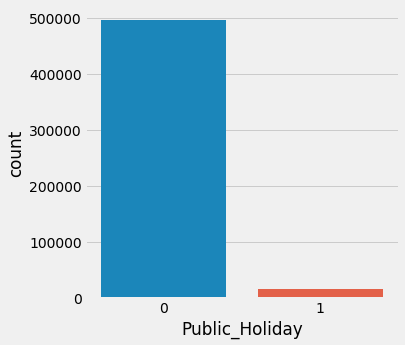

In [16]:
# Distribution of Public_Holiday
plt.figure(figsize= (5,5))
sns.countplot(train_df.Public_Holiday)

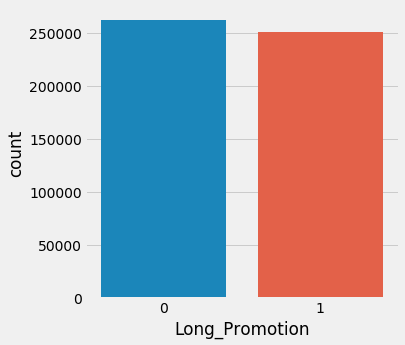

In [17]:
# Distribution of Long_Promotion
plt.figure(figsize= (5,5))
sns.countplot(train_df.Long_Promotion)

Bivariate Analysis

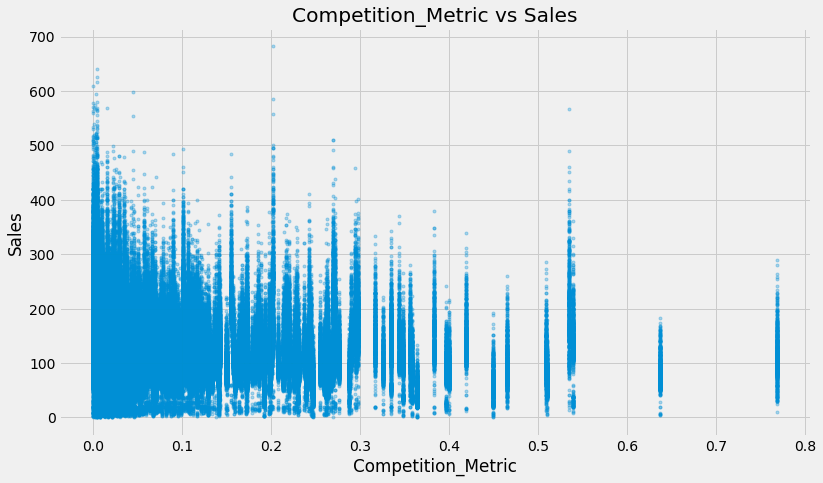

In [18]:
plt.figure(figsize= (12,7))
plt.xlabel('Competition_Metric')
plt.ylabel('Sales')
plt.title('Competition_Metric vs Sales')
plt.plot(train_df.Competition_Metric, train_df.Sales, '.', alpha= 0.3)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

train_data= pd.get_dummies(train_df, columns= ['Course_Type', 'Course_Domain'])
train_data.dtypes

ID                                      int64
Day_No                                  int64
Course_ID                               int64
Short_Promotion                         int64
Public_Holiday                          int64
Long_Promotion                          int64
User_Traffic                            int64
Competition_Metric                    float64
Sales                                   int64
Course_Type_Course                      uint8
Course_Type_Degree                      uint8
Course_Type_Program                     uint8
Course_Domain_Business                  uint8
Course_Domain_Development               uint8
Course_Domain_Finance & Accounting      uint8
Course_Domain_Software Marketing        uint8
dtype: object

In [20]:
test_data= pd.get_dummies(test_df, columns= ['Course_Type', 'Course_Domain'])
test_data.dtypes

ID                                      int64
Day_No                                  int64
Course_ID                               int64
Short_Promotion                         int64
Public_Holiday                          int64
Long_Promotion                          int64
Competition_Metric                    float64
Course_Type_Course                      uint8
Course_Type_Degree                      uint8
Course_Type_Program                     uint8
Course_Domain_Business                  uint8
Course_Domain_Development               uint8
Course_Domain_Finance & Accounting      uint8
Course_Domain_Software Marketing        uint8
dtype: object

In [21]:
train_data.columns

Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales',
       'Course_Type_Course', 'Course_Type_Degree', 'Course_Type_Program',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing'],
      dtype='object')

In [22]:
#drop ids
train_data=train_data.drop(columns=['ID','Course_ID'])
test_data=test_data.drop(columns=['ID','Course_ID'])

In [23]:
x=train_data.drop(['Sales', 'User_Traffic'],axis=1)
y=train_data['Sales']
x_test=test_data

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

In [25]:
# Fill missing values
x_val['Competition_Metric'].fillna(x_train['Competition_Metric'].median(), inplace=True)
x_test['Competition_Metric'].fillna(x_train['Competition_Metric'].median(), inplace=True)
x_train['Competition_Metric'].fillna(x_train['Competition_Metric'].median(), inplace=True)

In [26]:
# #Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_x.fit(x_train)
x_train=sc_x.transform(x_train)
x_val=sc_x.transform(x_val)
x_test=sc_x.transform(x_test)


#Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
round(lm.score(x_train,y_train)* 100,2)

20.23

In [29]:
predictions=lm.predict(x_val)

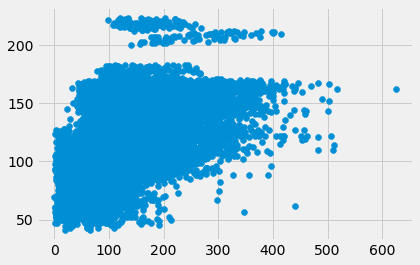

In [30]:
plt.scatter(y_val,predictions)

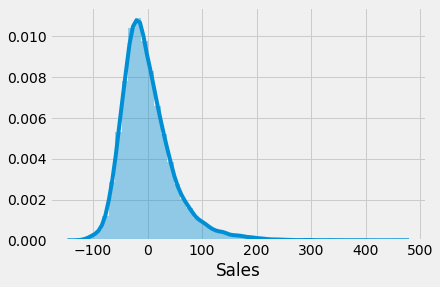

In [31]:
import seaborn as sns
sns.distplot((y_val-predictions))

In [32]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  35.85840509278123
Mean Squared Error:  2357.306215248984
Root Mean Squared Error:  48.552097948996845
Explained Variance Score:  0.2046312109740206


Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500,max_depth=6, n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
predictions_RF=rf.predict(x_val)

In [36]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions_RF))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions_RF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions_RF)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions_RF))

Mean Absolute Error:  33.967543353845365
Mean Squared Error:  2077.8201293699867
Root Mean Squared Error:  45.583112326496384
Explained Variance Score:  0.29893467362793313


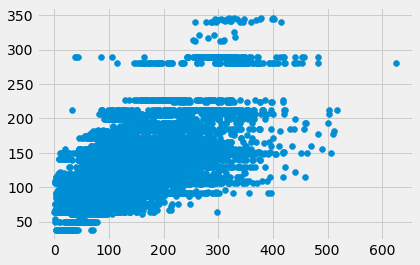

In [37]:
plt.scatter(y_val,predictions_RF)

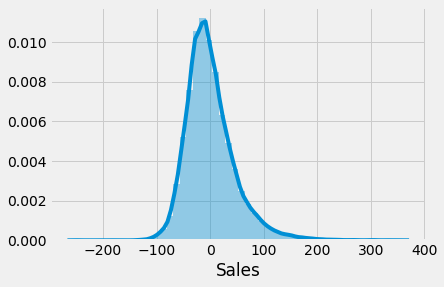

In [38]:
import seaborn as sns
sns.distplot((y_val-predictions_RF))

XGBoost

In [73]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=41, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.021,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.75,
             tree_method=None, validate_parameters=False, verbosity=None)

In [36]:
predictions_XG = xg_reg.predict(x_val)

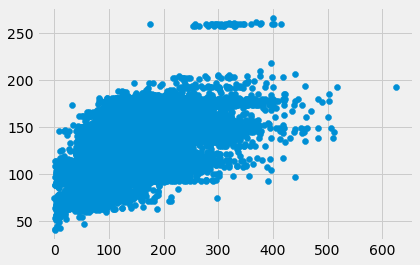

In [37]:
plt.scatter(y_val,predictions_XG)

In [38]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions_XG))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions_XG))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions_XG)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions_XG))

Mean Absolute Error:  33.85266991088464
Mean Squared Error:  2118.2273843874495
Root Mean Squared Error:  46.02420433193223
Explained Variance Score:  0.28639506441077467


Grid search for best parameters

In [39]:
from sklearn.model_selection import GridSearchCV
  
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)
}
gsearch1 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch1.fit(x,y)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 4}, -35.81861797631263)

In [40]:
#Tuning Gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch2 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)

gsearch2.fit(x,y)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, -35.819375707580825)

In [41]:
#Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}

gsearch3 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch3.fit(x,y)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.95, 'subsample': 0.95}, -35.77173809220353)

In [42]:
# Tuning Regularization Parameters
param_test4 = {
 'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]
}
gsearch4 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch4.fit(x,y)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.24}, -35.81935599331139)

In [43]:
# Tuning No. of trees
param_test5 = {
 'n_estimators':range(30,50,1)
}
gsearch5 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch5.fit(x,y)
gsearch5.best_params_, gsearch5.best_score_

({'n_estimators': 30}, -35.52141530361281)

In [68]:
import xgboost as xgb
data_dmatrix1 = xgb.DMatrix(data=x,label=y)
xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=4,
                          gamma=0,
                          subsample=0.95,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.24,
                          seed=42,
                          )
xg_reg1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=41, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.24,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.95,
             tree_method=None, validate_parameters=False, verbosity=None)

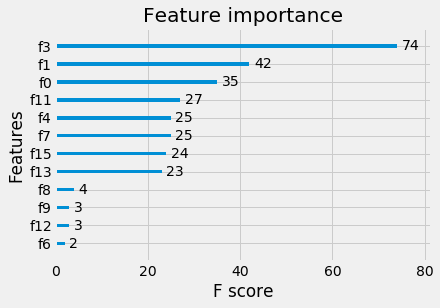

In [44]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [6, 5]
plt.show()

In [74]:
#Generating the Sales for the Test set and saving in a .csv file
pred_test = xg_reg.predict(x_test)
output_df= pd.DataFrame({'ID': test_df['ID'].values})
output_df['Sales']= pred_test
#output_df.to_csv('C:/Users/priyanka.CHEF5GWTN2/Downloads/submission2.csv', index=False)

# pred_test1 = xg_reg1.predict(x_test)
# output_df1= pd.DataFrame({'ID': test_df['ID'].values})
# output_df1['Sales']= pred_test1
# output_df1.to_csv('C:/Users/priyanka.CHEF5GWTN2/Downloads/submission2.csv', index=False)

# pred_test3 = rf.predict(x_test)
# output_df3= pd.DataFrame({'ID': test_df['ID'].values})
# output_df3['Sales']= pred_test3
# output_df3.to_csv('C:/Users/priyanka.CHEF5GWTN2/Downloads/submission3.csv', index=False)

In [83]:
merge_df= pd.merge(output_df, output_df3, on= 'ID', how= 'inner')
#pd.concat([output_df, output_df3]).groupby(level=0).mean()
merge_df['avg_sales']= (merge_df.Sales_x + merge_df.Sales_y)/2
output_df4= pd.DataFrame({'ID': test_df['ID'].values})
output_df4['Sales']= merge_df['avg_sales']
output_df4.to_csv('.../submission4.csv', index=False)